# Foundational Mathematics for AI

# Assignment 6 - Multiple Linear Regression

The goal of this assignment is to build and interpret an effective multiple linear regression model to predict an employee's salary at Anthill Fabrication. To build this model, we will consider all the variables in the dataset as potential predictors of Salary.

**Background Information:**

Anthill Fabrication is a small manufacturing company that produces plastic parts for office furniture and other industrial applications.  The human resources (HR) department is tasked with managing and evaluating employee pay.  In particular, the HR team want to ensure that employees are being paid fairly.

The Salary data set has 208 observations (rows). Each row represents one employee of a small manufacturing company. In this assignment, we focus on building an effective linear regression model that predicts the employee's salary.  

An effective model is one that fits well, while at the same time, does not include variables that do not improve the model's effectiveness. Therefore, we seek variables that are highly correlated with Salary as candidates for inclusion in the model. At the same time, we realize that these variables may be correlated with one another and therefore do not necessarily all need to be included in the final model choice.  For this reason, there is both art and science in this modeling activity.

From the perspective of management, a key analytical skill is the ability to interpret and explain a modeling result.  No matter which model is finally chosen, one should be able to explain its meaning and justify the appropriateness of the model selected.  

## Exercise 1: Handling categorical variables in multiple linear regression models

**YOUR TURN**

Load the `salary_data1.csv` and `salary_data2.csv` files. Explain the difference between these two datasets, and the reason for this difference.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

filepath1 = '/content/drive/MyDrive/M4AI/salary_data1.csv'
filepath2 = '/content/drive/MyDrive/M4AI/salary_data2.csv'
salary_data1 = pd.read_csv(filepath1)
salary_data2 = pd.read_csv(filepath2)

salary_data1.head()

,EmpNum,EducLev,JobGrade,YrsExper,Age,Gender,YrsPrior,AnltcsExp,Salary,Unnamed: 9
0,14933,3,1,3,26,0,1,0,37000,NaN
1,17187,1,1,14,38,1,1,0,44100,NaN
2,10702,1,1,12,35,1,0,0,38200,NaN
3,13140,2,1,8,40,1,7,0,35600,NaN
4,17628,3,1,3,28,0,0,0,34000,NaN


In [3]:
salary_data2.head()

,EmpNum,EducLev1,EducLev2,EducLev3,EducLev4,EducLev5,JobGrade1,JobGrade2,JobGrade3,JobGrade4,JobGrade5,JobGrade6,YrsExper,Age,Gender,YrsPrior,AnltcsExp,Salary,Unnamed: 18
0,14933,0,0,1,0,0,1,0,0,0,0,0,3,26,0,1,0,37000,NaN
1,17187,1,0,0,0,0,1,0,0,0,0,0,14,38,1,1,0,44100,NaN
2,10702,1,0,0,0,0,1,0,0,0,0,0,12,35,1,0,0,38200,NaN
3,13140,0,1,0,0,0,1,0,0,0,0,0,8,40,1,7,0,35600,NaN
4,17628,0,0,1,0,0,1,0,0,0,0,0,3,28,0,0,0,34000,NaN


In [4]:
salary_data2.drop('Unnamed: 18', axis=1, inplace=True)

### Explanation of Differences
The primary difference between salary_data1.csv and salary_data2.csv lies in how the categorical variables, specifically 'Education Level' and 'Job Grade', are represented.

salary_data1.csv contains the original numerical values in one column.

salary_data2.csv has transformed these categorical variables into a different features with "1" representing the presence of the feature which is more suitable for regression analysis.

The original approach assumes that the "distance" or difference between each level is equal (e.g., the difference in salary impact between EducLev 1 and 2 is the same as between EducLev 4 and 5), which may not always be the case in reality. The second approach is better because it doesn't make assumptions about the relationships between the categories. Therefore, it is more suitable for linear regression.  

## Exercise 2: Fitting a multiple linear regression model with 'promising' candidates as explanatory (independent) variables

We will now use the `salary_data2.csv` dataset for the rest of this assignment.

**YOUR TURN**

(a) Compute the correlation of all predictors with employee salary.  Identify the top 3 most highly correlated variables.

(b) Fit the linear regression model that predicts the employee salary using the top 3 most correlated variables as predictors.  Write the equation of the resulting model.

(c) Interpret, in one sentence each, the meaning of two of the estimated slope coefficients from the model estimated in part (b).

(d) How well does the model estimated in part (b) fit the data? Justify your answer.


In [5]:
correlation_matrix = salary_data2.corr()
salary_correlation = correlation_matrix['Salary'].drop('Salary')
print("Correlation coefficients with Salary:")
display(salary_correlation.sort_values(ascending=False))

Correlation coefficients with Salary:


,Salary
JobGrade6,0.659889
YrsExper,0.577970
EducLev5,0.519609
JobGrade5,0.401712
Age,0.349934
JobGrade4,0.228253
EmpNum,0.053388
EducLev4,0.050954
JobGrade3,-0.001567
AnltcsExp,-0.027661


In [6]:
sorted_correlation = salary_correlation.abs().sort_values(ascending=False)
top_3_correlated_variables = sorted_correlation.head(3)

print("Top 3 most highly correlated variables with Salary (based on absolute correlation):")
top_3_correlated_variables

Top 3 most highly correlated variables with Salary (based on absolute correlation):


,Salary
JobGrade6,0.659889
JobGrade1,0.578745
YrsExper,0.577970


Top 3 most highly correlated variables with Salary (based on absolute correlation) are JobGrade6, JobGrade1 and YesExper (JobGrade1 has a negative correlation)

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = salary_data2[['JobGrade6', 'JobGrade1', 'YrsExper']]
y = salary_data2['Salary']

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

print("Equation of the linear regression model:")
print(f"Salary = {intercept:.1f} + {coefficients[0]:.1f} * JobGrade6 + ({coefficients[1]:.1f}) * JobGrade1 + {coefficients[2]:.1f} * YesExper")


Equation of the linear regression model:
Salary = 50412.7 + 30328.1 * JobGrade6 + (-18761.5) * JobGrade1 + 690.4 * YesExper


### Interpretation
For every one year increase in 'YrsExper', the predicted 'Salary' increases by approximately \$690.4, assuming 'JobGrade6' and 'JobGrade1' remain constant.

Holding 'JobGrade6' and 'YrsExper' constant, being in 'JobGrade1' (as opposed to not being in JobGrade1) is associated with a decrease in predicted 'Salary' by approximately \$18761.5.

In [8]:
r_squared = model.score(X, y)
print(f"The R-squared value for the model is: {r_squared:.4f}")

The R-squared value for the model is: 0.7054


The goodness of fit of the model estimated in part (b) can be assessed using metrics like the R-squared value.
A higher R-squared value indicates that a larger proportion (0.7054) of the variance in the dependent variable (Salary) is explained by the independent variables (JobGrade6, JobGrade1, and YrsExper), suggesting a decent fit.

## Exercise 3: Improving the fit of a multiple linear regression model

**YOUR TURN**

It seems reasonable to suspect that including more explanatory variables in the model could perhaps improve it's fit to the data. But does it really?

(a) Construct the “all variables in” regression model to predict employee salary. That is, use all variables in the data set to predict employee salary.  

(b) How does the fit of this model compare to Exercise 2(b)? Is this surprising?   *Hint:* Does it make sense to use the Employee ID as a predictor of their salary?  Why or why not?

(c) Given what has been learned from the models estimated in Exercise 2(b) and Exercise 3(b), estimate an improved multiple linear regression model to predict employee salary that is effective.

**Note:** Stated another way, estimate a linear regression model for employee salary that fits well, but also contains the 'right' choice and number of explanatory variables. That is, the model contains sufficiently many independent variables to provide a good fit to the data, but does not contain variables that may be correlated with one another and therefore do not necessarily all need to be included in the final model.

(d) Report the variables that are used in your model from part (c), and justify why you chose them. Write down the estimated coefficients and equations for your model, and the evaluate the fit of this selected model.

(e) Interpret the findings on this assignment for Anthill management.  What have you learned from this modeling exercise that is useful for Anthill?

In [9]:
X_all = salary_data2.drop(['Salary'], axis=1)
y_all = salary_data2['Salary']

model_all = LinearRegression()
model_all.fit(X_all, y_all)

r_squared_all = model_all.score(X_all, y_all)

print(f"\nThe R-squared value for the 'all variables in' model is: {r_squared_all:.4f}")


The R-squared value for the 'all variables in' model is: 0.9098


The R-squared value for the "all variables in" model (0.9098) is significantly higher than the R-squared value for the model using only the top 3 most correlated variables from Exercise 2(b) (0.7054). This indicates a better fit of the model to the data when all variables are included.

This is not necessarily surprising from a statistical perspective, as including more independent variables in a linear regression model will generally increase the R-squared value, even if the added variables are not truly predictive of the dependent variable in the real world.

However, it doesn't make practical sense to use Employee ID as a predictor of salary. Employee ID is a unique number assigned to each employee and has no inherent relationship with their salary. It's essentially an arbitrary label. Including it in the model is likely causing the model to overfit the training data, meaning it's capturing noise and specific patterns in the training data that won't generalize well to unseen data.

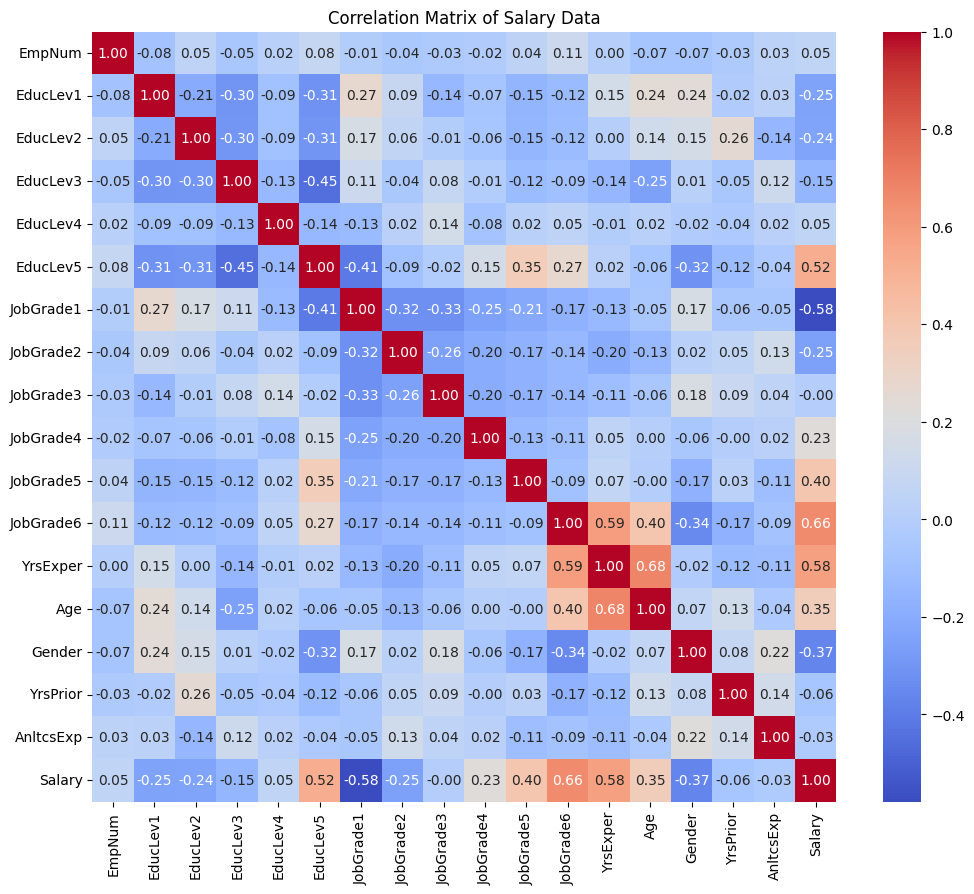

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = salary_data2.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Salary Data')
plt.show()

In [11]:
top_correlated_variables = sorted_correlation.sort_values(ascending=False).head(10)
top_correlated_variables

,Salary
JobGrade6,0.659889
JobGrade1,0.578745
YrsExper,0.577970
EducLev5,0.519609
JobGrade5,0.401712
Gender,0.367528
Age,0.349934
JobGrade2,0.252687
EducLev1,0.245556
EducLev2,0.238530


In [12]:
feature_corr = correlation_matrix.drop('Salary').drop('Salary', axis=1)
final_features = []
used_features = set()
salary_corr = salary_correlation.abs()
threshold = 0.4

for col in top_correlated_variables.index:
    if col == 'Salary':
        continue
    # Get max correlation of this feature with other features (excluding itself and Salary)
    max_corr = feature_corr[col].drop(col).abs().max()
    if max_corr < threshold:
        final_features.append(col)
        used_features.add(col)
    else:
        # If correlation is higher than 0.4, select the feature with higher correlation with Salary among correlated pairs
        correlated_features = feature_corr[col].drop(col).abs()
        high_corr_features = correlated_features[correlated_features >= threshold].index.tolist()
        # Only add if not already used
        candidates = [col] + high_corr_features
        best_feature = max(candidates, key=lambda x: salary_corr.get(x, 0))
        if best_feature not in used_features:
            final_features.append(best_feature)
            used_features.add(best_feature)

if 'EmpNum' in final_features:
    final_features.remove('EmpNum')

print("Final selected features for training:")
print(final_features)

Final selected features for training:
['JobGrade6', 'JobGrade1', 'JobGrade5', 'Gender', 'YrsExper', 'JobGrade2', 'EducLev1', 'EducLev2']


These variables were selected because each has a correlation with other predictors below the threshold of 0.4 (which is optimized manually after some trial and error) and are among the top 10 correlated features with salary, which helps reduce redundant information and ensures that each variable provides unique information to the model. This approach improves model interpretability and generalizability, resulting in a more effective regression model.

In [13]:
X_final = salary_data2[final_features]
y_final = salary_data2['Salary']

model_final = LinearRegression()
model_final.fit(X_final, y_final)

equation_terms = []
for coef, feature in zip(model_final.coef_, final_features):
    if coef > 0:
        equation_terms.append(f"{coef:.1f} * {feature}")
    else:
        equation_terms.append(f"({coef:.1f}) * {feature}")
equation = f"Salary = {model_final.intercept_:.1f} + " + " + ".join(equation_terms)
print("Equation of the final regression model:")
print(equation)
print()
print("Coefficients:", model_final.coef_)
print("Intercept:", model_final.intercept_)

Equation of the final regression model:
Salary = 55609.5 + 29265.3 * JobGrade6 + (-19252.3) * JobGrade1 + 15082.1 * JobGrade5 + (-2993.6) * Gender + 533.6 * YrsExper + (-11765.3) * JobGrade2 + (-1200.2) * EducLev1 + (-2325.3) * EducLev2

Coefficients: [ 29265.33687764 -19252.29867076  15082.06488433  -2993.59962565
    533.55921558 -11765.34126843  -1200.21045878  -2325.25110634]
Intercept: 55609.51127765404


In [14]:
r_squared_final = model_final.score(X_final, y_final)
print(f"R-squared for final model: {r_squared_final:.4f}")

R-squared for final model: 0.8815


### Evaluation
The final regression model achieves a high R-squared value (0.8815), indicating strong explanatory power for employee salary. By selecting variables with high correlation to salary and minimizing redundant features, the model balances fit and interpretability.

### Interpretation for Anthill Management

This modeling exercise demonstrates that employee salary at Anthill Fabrication can be effectively predicted using a select group of variables, particularly job grade, years of experience, and certain education levels. Including only relevant predictors improves model interpretability, ensuring fair and data-driven salary decisions. The analysis also highlights that categorical variables should be properly encoded for regression, and arbitrary identifiers like Employee ID should not be used as predictors. Overall, the approach provides Anthill with a transparent and effective framework for evaluating and setting employee salaries.